In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
import warnings
from pyramid.arima import auto_arima

warnings.filterwarnings('ignore')
plt.style.use('bmh')
%matplotlib inline

In [2]:
# Load the dataset
data = pd.read_csv('../raw data/BTC-USD.csv')

In [3]:
# Preprocessing
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data = data.resample('D').mean()
data = data.ffill()

In [4]:
# Check missing values
np.where(np.isnan(data))

(array([], dtype=int64), array([], dtype=int64))

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-16,0.04951,0.04951,0.04951,0.04951,0.04951,0.0
2010-07-17,0.04951,0.08585,0.05941,0.08584,0.08584,5.0
2010-07-18,0.08584,0.09307,0.07723,0.08080,0.08080,49.0
2010-07-19,0.08080,0.08181,0.07426,0.07474,0.07474,20.0
2010-07-20,0.07474,0.07921,0.06634,0.07921,0.07921,42.0


In [6]:
data.index

DatetimeIndex(['2010-07-16', '2010-07-17', '2010-07-18', '2010-07-19',
               '2010-07-20', '2010-07-21', '2010-07-22', '2010-07-23',
               '2010-07-24', '2010-07-25',
               ...
               '2019-03-23', '2019-03-24', '2019-03-25', '2019-03-26',
               '2019-03-27', '2019-03-28', '2019-03-29', '2019-03-30',
               '2019-03-31', '2019-04-01'],
              dtype='datetime64[ns]', name='Date', length=3182, freq='D')

<table><tr><td bgcolor=orange><font size=3> SARIMA for "High"

In [7]:
y = data['High']

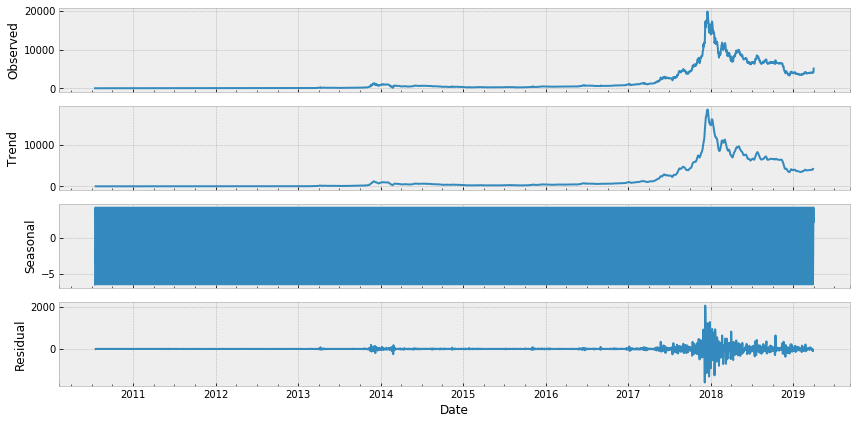

In [8]:
rcParams['figure.figsize'] = 12, 6

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()

In [9]:
# y = y['2017':]

In [10]:
# rcParams['figure.figsize'] = 12, 6

# decomposition = sm.tsa.seasonal_decompose(y, model='additive')
# fig = decomposition.plot()

### Build a Baseline Model

In [11]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.resample('MS').mean()
    rolstd = timeseries.resample('MS').std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    
    print()
    #Perform Ljung-Box test:
    print('Results of Ljung-Box Test:')
    lbtest = acorr_ljungbox(timeseries, lags=5)
    for i in range(5):
        print('Largest Lag Included:{} Test Statistic={}  p-value={}'.format(i, lbtest[0][i], lbtest[1][i]))

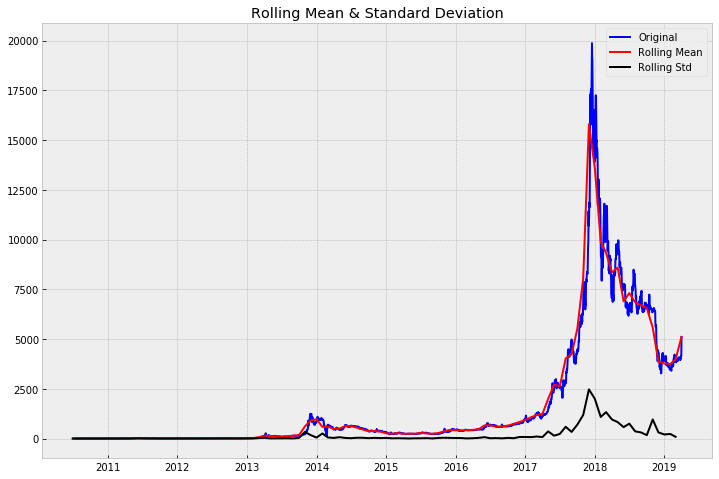

Results of Dickey-Fuller Test:
Test Statistic                   -1.671310
p-value                           0.445952
#Lags Used                       29.000000
Number of Observations Used    3152.000000
Critical Value (1%)              -3.432426
Critical Value (5%)              -2.862457
Critical Value (10%)             -2.567258
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=3174.4024879735316  p-value=0.0
Largest Lag Included:1 Test Statistic=6336.182863079807  p-value=0.0
Largest Lag Included:2 Test Statistic=9485.427131401071  p-value=0.0
Largest Lag Included:3 Test Statistic=12623.380945429295  p-value=0.0
Largest Lag Included:4 Test Statistic=15748.976556130026  p-value=0.0


In [12]:
test_stationarity(y)

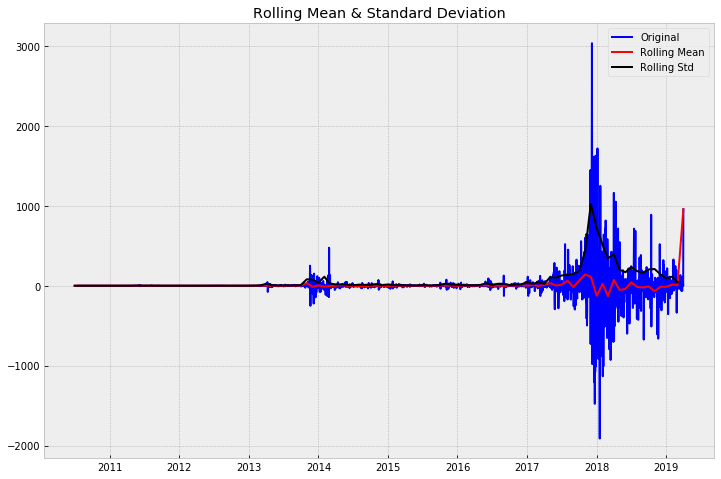

Results of Dickey-Fuller Test:
Test Statistic                -1.050525e+01
p-value                        1.058405e-18
#Lags Used                     2.900000e+01
Number of Observations Used    3.151000e+03
Critical Value (1%)           -3.432427e+00
Critical Value (5%)           -2.862458e+00
Critical Value (10%)          -2.567259e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=136.2112024115486  p-value=1.793969154623794e-31
Largest Lag Included:1 Test Statistic=136.25406066056794  p-value=2.5870609409525546e-30
Largest Lag Included:2 Test Statistic=150.64763764078504  p-value=1.910104089021639e-32
Largest Lag Included:3 Test Statistic=163.47235490146423  p-value=2.6310228093992805e-34
Largest Lag Included:4 Test Statistic=175.03306209781692  p-value=6.151408626701383e-36


In [13]:
test_stationarity(y.diff(1).dropna())

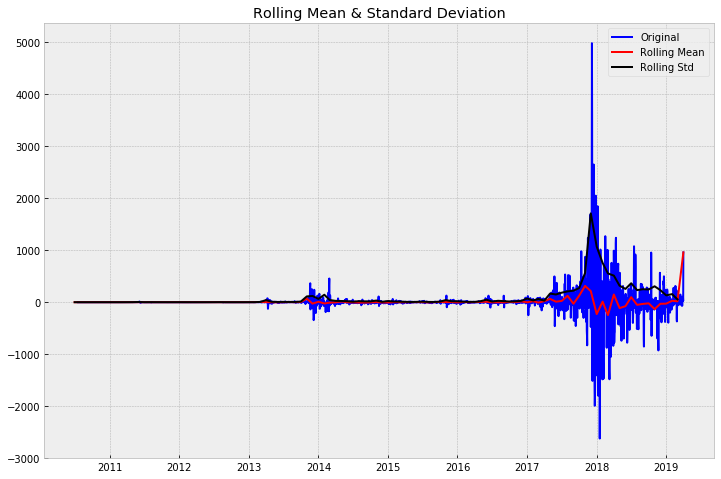

Results of Dickey-Fuller Test:
Test Statistic                -1.094286e+01
p-value                        9.201850e-20
#Lags Used                     2.900000e+01
Number of Observations Used    3.150000e+03
Critical Value (1%)           -3.432428e+00
Critical Value (5%)           -2.862458e+00
Critical Value (10%)          -2.567259e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=1079.3495650368652  p-value=1.0166641085343092e-236
Largest Lag Included:1 Test Statistic=1088.9638122260412  p-value=3.4238338314527373e-237
Largest Lag Included:2 Test Statistic=1092.1297659318134  p-value=1.855704683332602e-236
Largest Lag Included:3 Test Statistic=1099.961161206905  p-value=7.71978103856549e-237
Largest Lag Included:4 Test Statistic=1108.976167780625  p-value=1.521462783920838e-237


In [14]:
test_stationarity(y.diff(2).dropna())

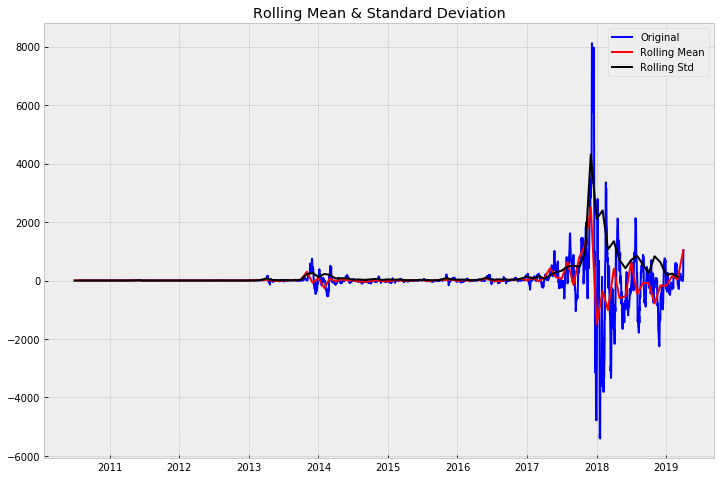

Results of Dickey-Fuller Test:
Test Statistic                -8.100272e+00
p-value                        1.305507e-12
#Lags Used                     2.800000e+01
Number of Observations Used    3.141000e+03
Critical Value (1%)           -3.432434e+00
Critical Value (5%)           -2.862461e+00
Critical Value (10%)          -2.567260e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=2818.879277156336  p-value=0.0
Largest Lag Included:1 Test Statistic=5165.558357186598  p-value=0.0
Largest Lag Included:2 Test Statistic=7112.356821966436  p-value=0.0
Largest Lag Included:3 Test Statistic=8735.530910270958  p-value=0.0
Largest Lag Included:4 Test Statistic=10050.21830535097  p-value=0.0


In [15]:
test_stationarity(y.diff(12).dropna())

#### According to the decomposition of y_train, seasonality is relatively small. 
#### Comparing the results of the first and second difference, we use the first difference.

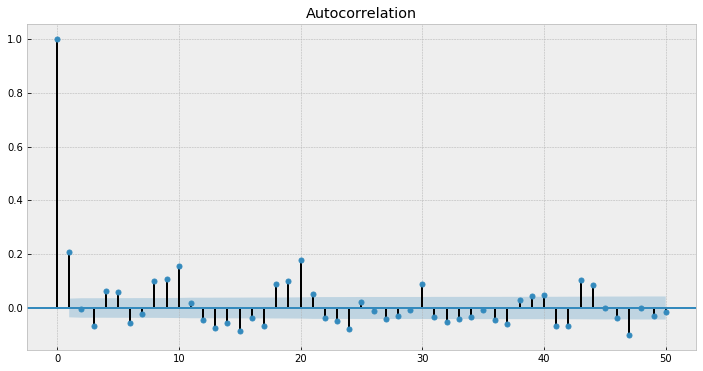

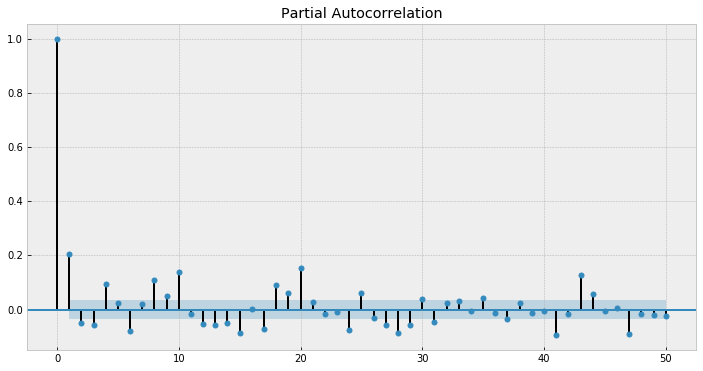

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
 
acf = plot_acf(y.diff(1).dropna(), lags=50)
pacf = plot_pacf(y.diff(1).dropna(), lags=50)

In [ ]:
mod_baseline = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order = (0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_baseline = mod_baseline.fit()

print(results_baseline.summary().tables[1])
print(results_baseline.aic)
b = results_baseline.plot_diagnostics(figsize=(15, 12))

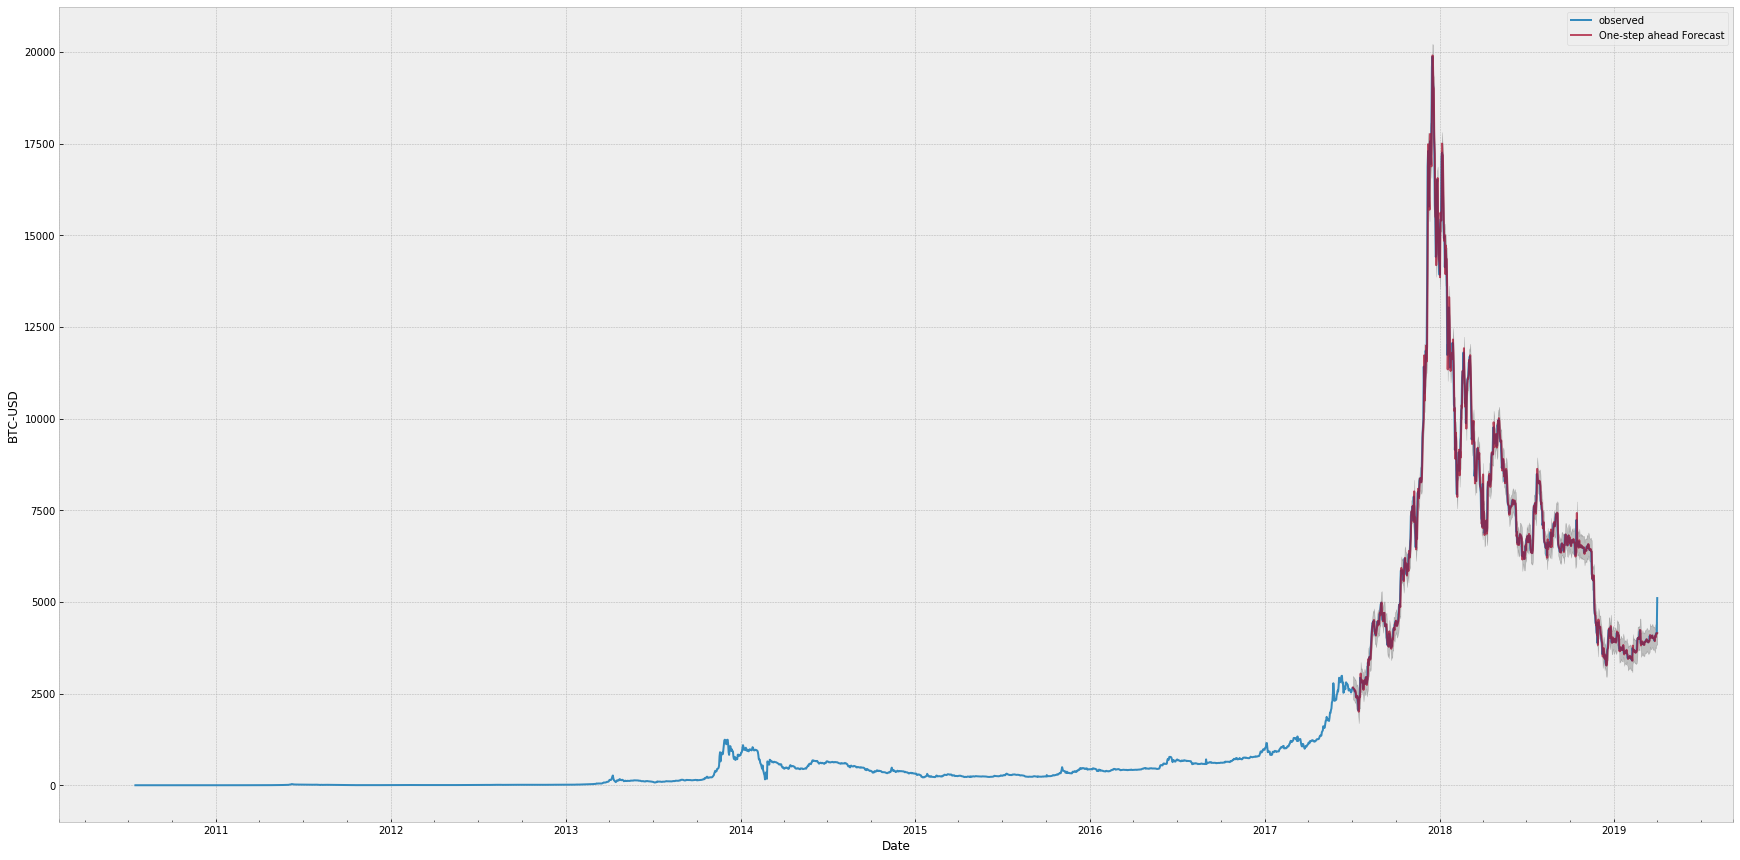

In [18]:
pred = results_baseline.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [19]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 124750.2577
The R2 of our model is 0.9891


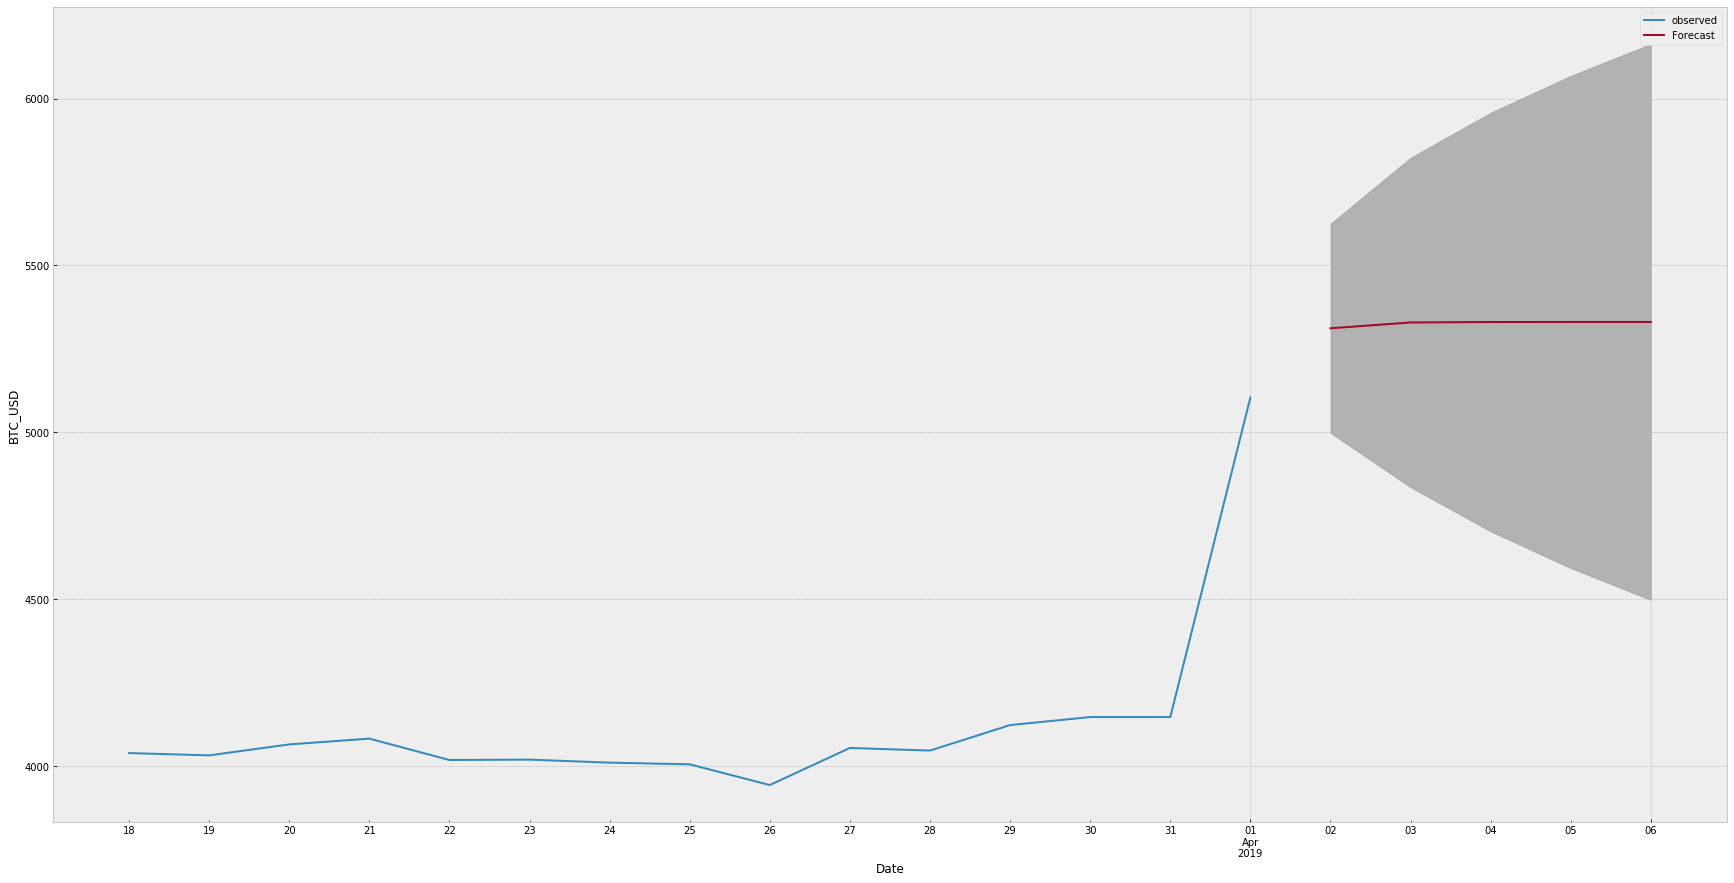

In [20]:
# Forcast the future
pred_uc = results_baseline.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

### Build an Advanced Model by Grid Search

In [21]:
d = [1]
p = q = range(21)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(0, 0, 0, 12)]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[-2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[-1], seasonal_pdq[0]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 0, 0, 12)
SARIMAX: (0, 1, 2) x (0, 0, 0, 12)
SARIMAX: (20, 1, 19) x (0, 0, 0, 12)
SARIMAX: (20, 1, 20) x (0, 0, 0, 12)


In [22]:
AIC_list = pd.DataFrame({}, columns=['param','param_seasonal','AIC'])

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                           order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            temp = pd.DataFrame([[ param ,  param_seasonal , results.aic ]], columns=['param','param_seasonal','AIC'])
            AIC_list = AIC_list.append( temp, ignore_index=True)

        except:
            continue

print('Finished...')

AIC_list = AIC_list.dropna()
m = np.amin(AIC_list['AIC'].values) # Find the minimum value in AIC
l = AIC_list['AIC'].tolist().index(m) # Find the index number of the lowest AIC
Min_AIC_list = AIC_list.iloc[l,:]

ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:41448.22663412033
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:41294.82263906153
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:41281.47203845429
ARIMA(0, 1, 3)x(0, 0, 0, 12)12 - AIC:41240.754837564484
ARIMA(0, 1, 4)x(0, 0, 0, 12)12 - AIC:41229.36294681145
ARIMA(0, 1, 5)x(0, 0, 0, 12)12 - AIC:41193.92782215689
ARIMA(0, 1, 6)x(0, 0, 0, 12)12 - AIC:41174.43549913324
ARIMA(0, 1, 7)x(0, 0, 0, 12)12 - AIC:41156.6120712189
ARIMA(0, 1, 8)x(0, 0, 0, 12)12 - AIC:41127.29097725539
ARIMA(0, 1, 9)x(0, 0, 0, 12)12 - AIC:41104.322955018186
ARIMA(0, 1, 10)x(0, 0, 0, 12)12 - AIC:41040.76587109103
ARIMA(0, 1, 11)x(0, 0, 0, 12)12 - AIC:41029.94634800549
ARIMA(0, 1, 12)x(0, 0, 0, 12)12 - AIC:41008.28729349532
ARIMA(0, 1, 13)x(0, 0, 0, 12)12 - AIC:40966.04743711832
ARIMA(0, 1, 14)x(0, 0, 0, 12)12 - AIC:40955.479538572275
ARIMA(0, 1, 15)x(0, 0, 0, 12)12 - AIC:40924.69966664958
ARIMA(0, 1, 16)x(0, 0, 0, 12)12 - AIC:40914.44707463798
ARIMA(0, 1, 17)x(0, 0, 0, 12)12 - AIC:40884.43951761203


ARIMA(7, 1, 1)x(0, 0, 0, 12)12 - AIC:41148.924277913466
ARIMA(7, 1, 2)x(0, 0, 0, 12)12 - AIC:41010.71301350917
ARIMA(7, 1, 3)x(0, 0, 0, 12)12 - AIC:41189.13251443392
ARIMA(7, 1, 4)x(0, 0, 0, 12)12 - AIC:41175.40317616284
ARIMA(7, 1, 5)x(0, 0, 0, 12)12 - AIC:41024.83486959694
ARIMA(7, 1, 6)x(0, 0, 0, 12)12 - AIC:41009.07585883703
ARIMA(7, 1, 7)x(0, 0, 0, 12)12 - AIC:41014.37736183159
ARIMA(7, 1, 8)x(0, 0, 0, 12)12 - AIC:40968.19537079284
ARIMA(7, 1, 9)x(0, 0, 0, 12)12 - AIC:40933.76422547409
ARIMA(7, 1, 10)x(0, 0, 0, 12)12 - AIC:40897.50816074872
ARIMA(7, 1, 11)x(0, 0, 0, 12)12 - AIC:40864.21369945364
ARIMA(7, 1, 12)x(0, 0, 0, 12)12 - AIC:40861.43296398943
ARIMA(7, 1, 13)x(0, 0, 0, 12)12 - AIC:40797.17372041977
ARIMA(7, 1, 14)x(0, 0, 0, 12)12 - AIC:40802.19392959599
ARIMA(7, 1, 15)x(0, 0, 0, 12)12 - AIC:40754.21045464758
ARIMA(7, 1, 16)x(0, 0, 0, 12)12 - AIC:40746.26252573349
ARIMA(7, 1, 17)x(0, 0, 0, 12)12 - AIC:40726.550642481554
ARIMA(7, 1, 18)x(0, 0, 0, 12)12 - AIC:40714.91834006089

ARIMA(14, 1, 0)x(0, 0, 0, 12)12 - AIC:40971.689763312825
ARIMA(14, 1, 1)x(0, 0, 0, 12)12 - AIC:40961.84054789266
ARIMA(14, 1, 2)x(0, 0, 0, 12)12 - AIC:40870.07666064681
ARIMA(14, 1, 3)x(0, 0, 0, 12)12 - AIC:40868.62330411269
ARIMA(14, 1, 4)x(0, 0, 0, 12)12 - AIC:40869.098759757006
ARIMA(14, 1, 5)x(0, 0, 0, 12)12 - AIC:40840.12538178649
ARIMA(14, 1, 6)x(0, 0, 0, 12)12 - AIC:42673.45961837284
ARIMA(14, 1, 7)x(0, 0, 0, 12)12 - AIC:43236.509764854454
ARIMA(14, 1, 8)x(0, 0, 0, 12)12 - AIC:40850.76419882066
ARIMA(14, 1, 9)x(0, 0, 0, 12)12 - AIC:40871.330146084
ARIMA(14, 1, 10)x(0, 0, 0, 12)12 - AIC:40839.126499356484
ARIMA(14, 1, 11)x(0, 0, 0, 12)12 - AIC:40827.44765082142
ARIMA(14, 1, 12)x(0, 0, 0, 12)12 - AIC:40796.60552400765
ARIMA(14, 1, 13)x(0, 0, 0, 12)12 - AIC:40805.46998713384
ARIMA(14, 1, 14)x(0, 0, 0, 12)12 - AIC:40799.72205211704
ARIMA(14, 1, 15)x(0, 0, 0, 12)12 - AIC:40744.338517896605
ARIMA(14, 1, 16)x(0, 0, 0, 12)12 - AIC:40755.15717051197
ARIMA(14, 1, 17)x(0, 0, 0, 12)12 - AIC

ARIMA(20, 1, 20)x(0, 0, 0, 12)12 - AIC:40635.0789709501
Finished...


### Min_AIC_list ### 
param               (20, 1, 17)
param_seasonal    (0, 0, 0, 12)
AIC                       40603
Name: 436, dtype: object
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0845      0.066      1.279      0.201      -0.045       0.214
ar.L2          0.1807      0.043      4.168      0.000       0.096       0.266
ar.L3         -0.4799      0.037    -13.070      0.000      -0.552      -0.408
ar.L4         -0.0185      0.058     -0.320      0.749      -0.132       0.095
ar.L5          0.4692      0.029     16.437      0.000       0.413       0.525
ar.L6         -0.3750      0.039     -9.550      0.000      -0.452      -0.298
ar.L7         -0.0126      0.042     -0.304      0.761      -0.094       0.069
ar.L8         -0.1831      0.025     -7.271      0.000      -0.232      -0.134
ar.L9         -0.1814      0.023     -7.830      0.000      -0.227 

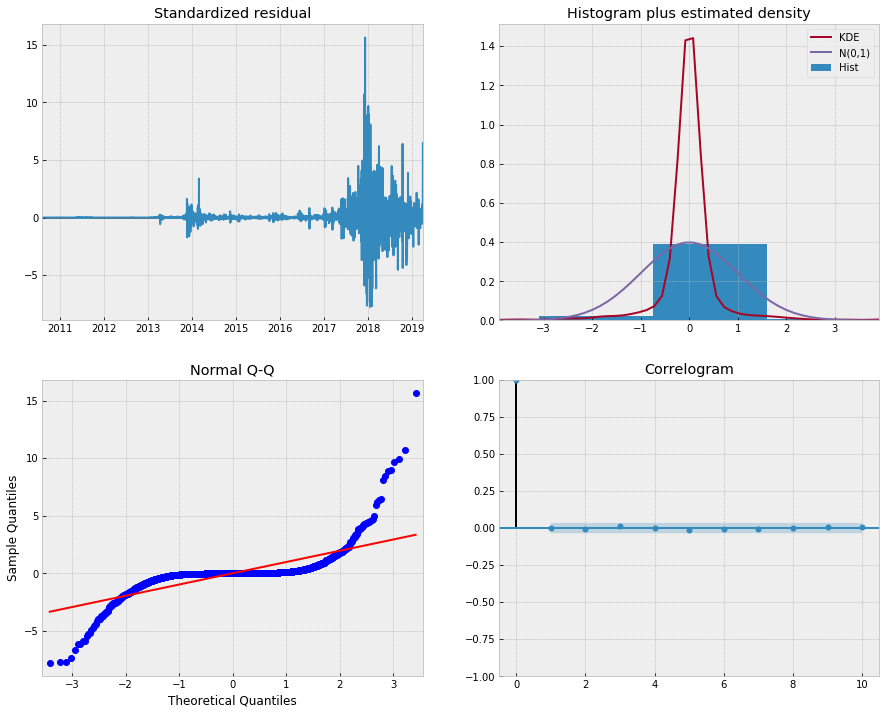

In [23]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=Min_AIC_list['param'],
                                seasonal_order=Min_AIC_list['param_seasonal'],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print("### Min_AIC_list ### \n{}".format(Min_AIC_list))

print(results.summary().tables[1])
dia = results.plot_diagnostics(figsize=(15, 12))

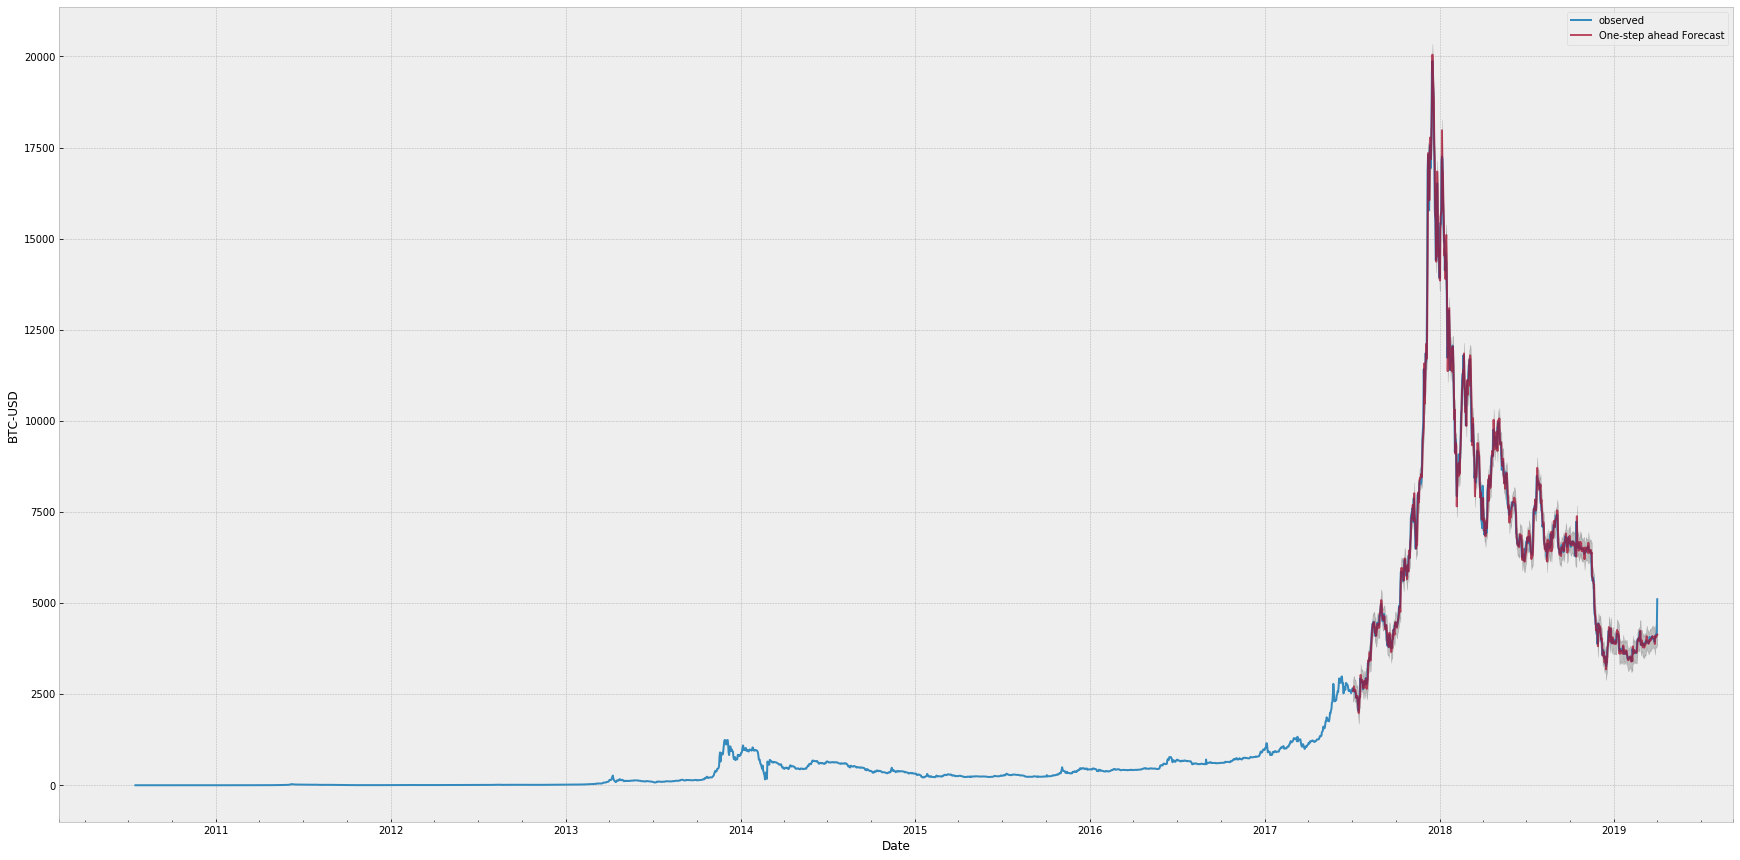

In [24]:
pred = results.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [25]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 103339.0619
The R2 of our model is 0.991


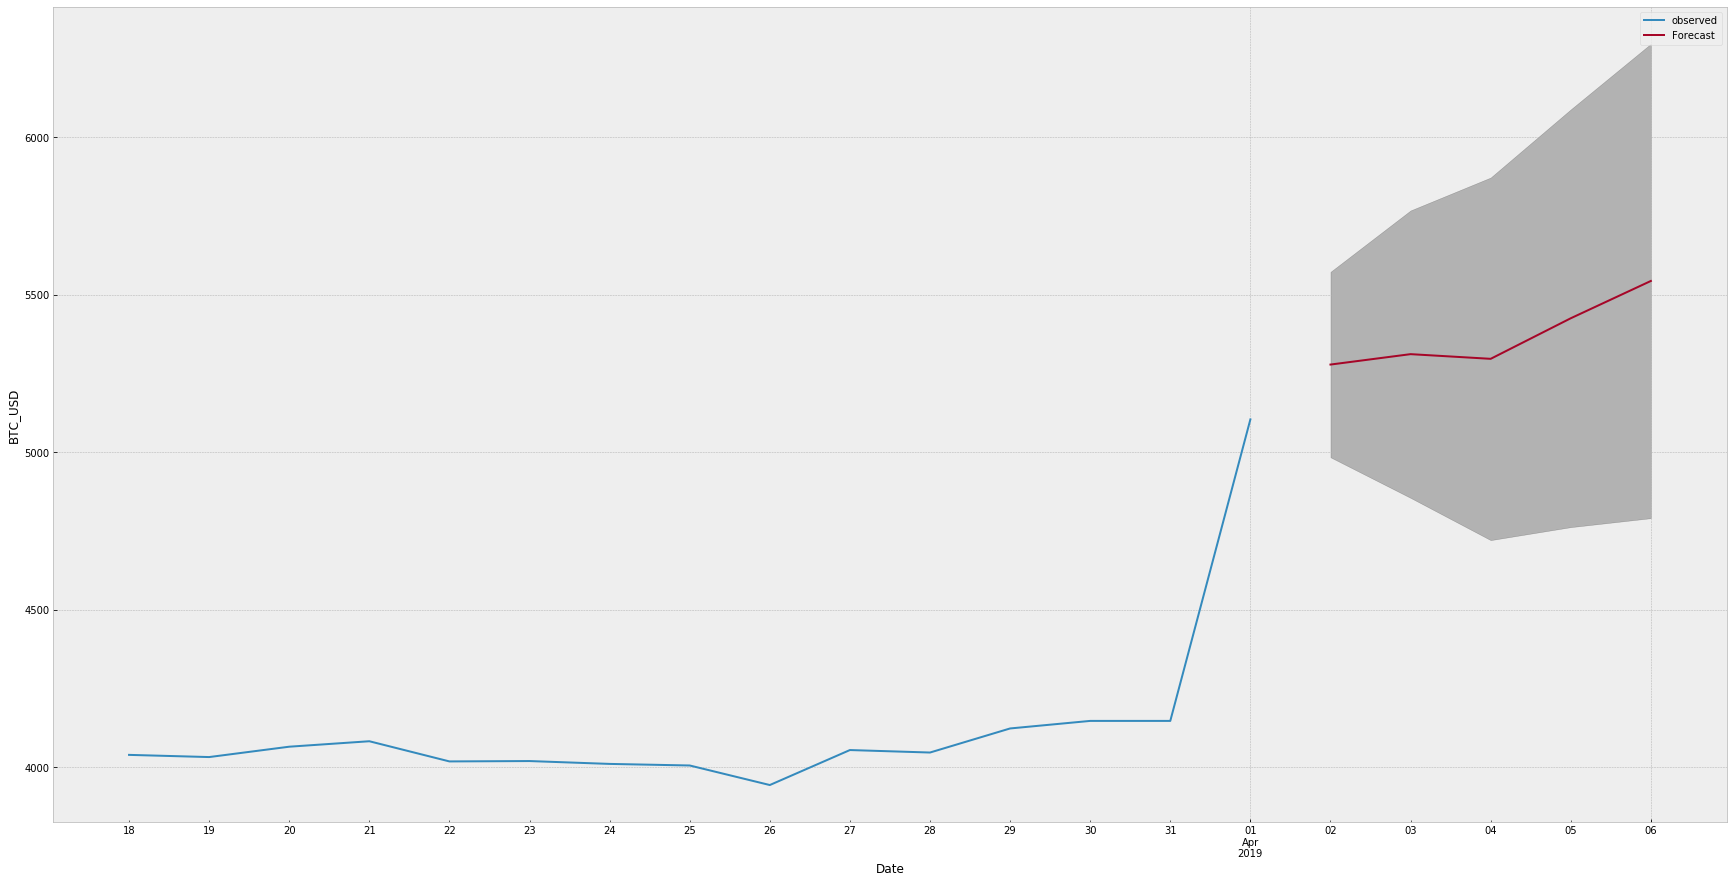

In [26]:
# Forcast the future
pred_uc = results.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

#### The advanced model slightly outperforms the baseline model.

<table><tr><td bgcolor=orange><font size=3> SARIMA for "Low"

In [27]:
y = data['Low']

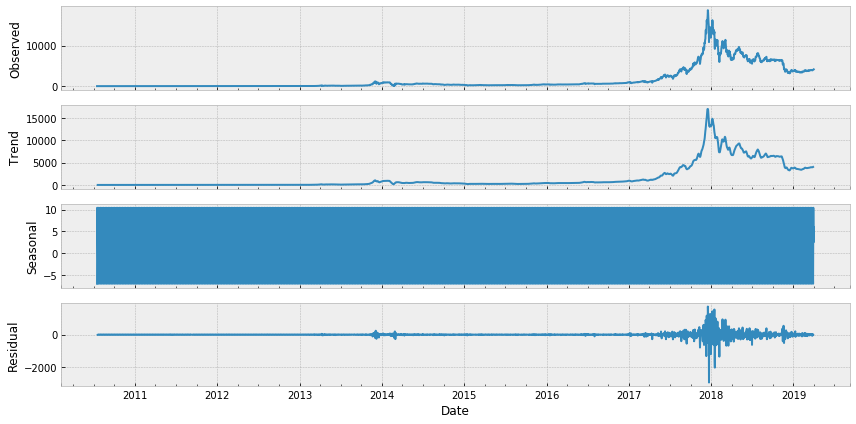

In [28]:
rcParams['figure.figsize'] = 12, 6

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()

In [29]:
# y = y['2017':]

In [30]:
# rcParams['figure.figsize'] = 12, 6

# decomposition = sm.tsa.seasonal_decompose(y, model='additive')
# fig = decomposition.plot()

### Build a Baseline Model

In [31]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.resample('MS').mean()
    rolstd = timeseries.resample('MS').std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    
    print()
    #Perform Ljung-Box test:
    print('Results of Ljung-Box Test:')
    lbtest = acorr_ljungbox(timeseries, lags=5)
    for i in range(5):
        print('Largest Lag Included:{} Test Statistic={}  p-value={}'.format(i, lbtest[0][i], lbtest[1][i]))

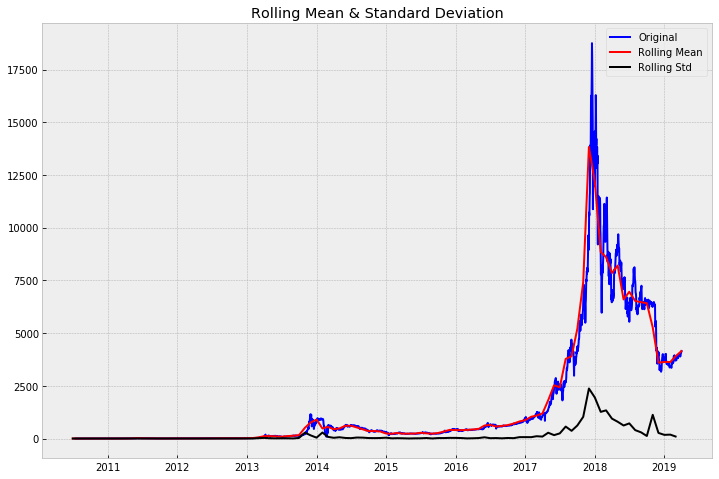

Results of Dickey-Fuller Test:
Test Statistic                   -1.865996
p-value                           0.348223
#Lags Used                       29.000000
Number of Observations Used    3152.000000
Critical Value (1%)              -3.432426
Critical Value (5%)              -2.862457
Critical Value (10%)             -2.567258
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=3168.511032130423  p-value=0.0
Largest Lag Included:1 Test Statistic=6321.664184374432  p-value=0.0
Largest Lag Included:2 Test Statistic=9458.61360560196  p-value=0.0
Largest Lag Included:3 Test Statistic=12579.43214827024  p-value=0.0
Largest Lag Included:4 Test Statistic=15685.637155287399  p-value=0.0


In [32]:
test_stationarity(y)

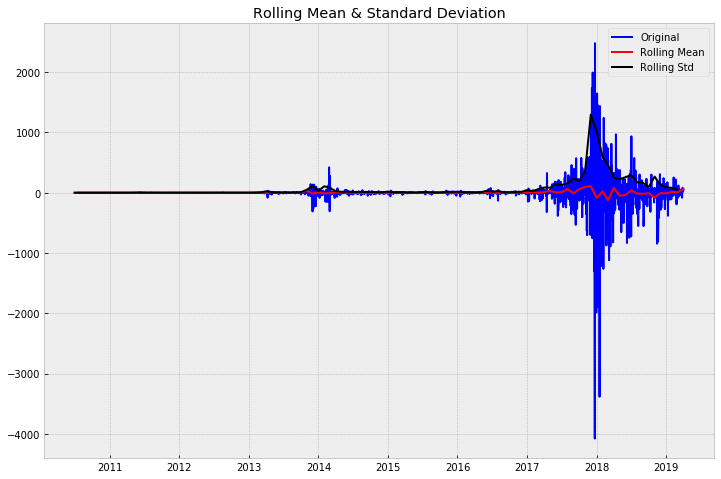

Results of Dickey-Fuller Test:
Test Statistic                -1.099101e+01
p-value                        7.059844e-20
#Lags Used                     2.900000e+01
Number of Observations Used    3.151000e+03
Critical Value (1%)           -3.432427e+00
Critical Value (5%)           -2.862458e+00
Critical Value (10%)          -2.567259e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=0.01314776636118604  p-value=0.9087116794788439
Largest Lag Included:1 Test Statistic=2.7413167410719925  p-value=0.2539397180771101
Largest Lag Included:2 Test Statistic=2.7420162445639873  p-value=0.43313423085287095
Largest Lag Included:3 Test Statistic=10.231753511080099  p-value=0.03669962951870971
Largest Lag Included:4 Test Statistic=23.434474664107622  p-value=0.00027874296239206286


In [33]:
test_stationarity(y.diff(1).dropna())

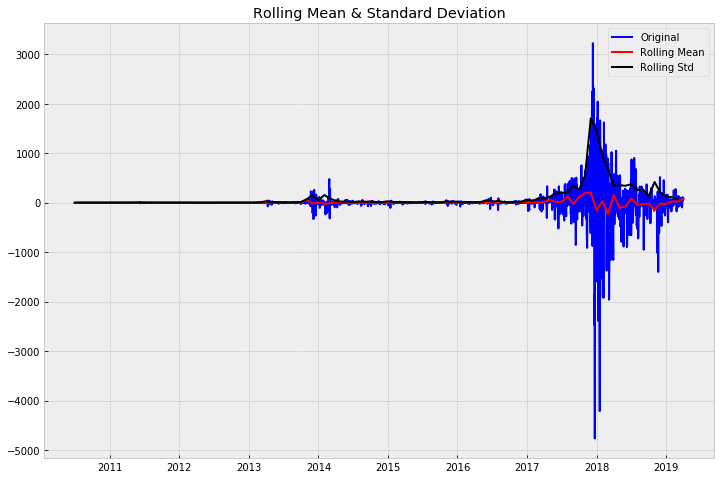

Results of Dickey-Fuller Test:
Test Statistic                -1.178563e+01
p-value                        1.010439e-21
#Lags Used                     2.900000e+01
Number of Observations Used    3.150000e+03
Critical Value (1%)           -3.432428e+00
Critical Value (5%)           -2.862458e+00
Critical Value (10%)          -2.567259e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=839.7385759506363  p-value=1.237193055368019e-184
Largest Lag Included:1 Test Statistic=842.2457608892307  p-value=1.2842714252312514e-183
Largest Lag Included:2 Test Statistic=842.5710414202105  p-value=2.5309344704020483e-182
Largest Lag Included:3 Test Statistic=863.5139266447712  p-value=1.3383736279115986e-185
Largest Lag Included:4 Test Statistic=864.415028749054  p-value=1.336811304082678e-184


In [34]:
test_stationarity(y.diff(2).dropna())

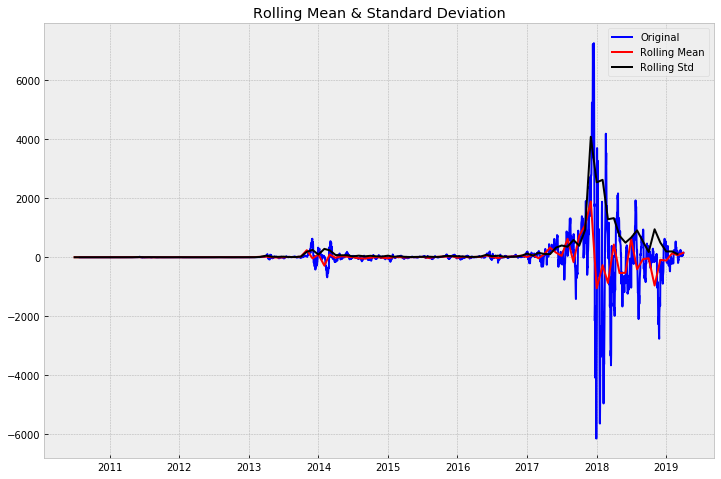

Results of Dickey-Fuller Test:
Test Statistic                -9.177569e+00
p-value                        2.298025e-15
#Lags Used                     2.900000e+01
Number of Observations Used    3.140000e+03
Critical Value (1%)           -3.432434e+00
Critical Value (5%)           -2.862461e+00
Critical Value (10%)          -2.567260e+00
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=2639.1192023273943  p-value=0.0
Largest Lag Included:1 Test Statistic=4775.717650281372  p-value=0.0
Largest Lag Included:2 Test Statistic=6428.544141385295  p-value=0.0
Largest Lag Included:3 Test Statistic=7666.053980866333  p-value=0.0
Largest Lag Included:4 Test Statistic=8567.378224759272  p-value=0.0


In [35]:
test_stationarity(y.diff(12).dropna())

#### According to the decomposition of y_train, seasonality is relatively small. 
#### Comparing the results of the first and second difference, we use the first difference.

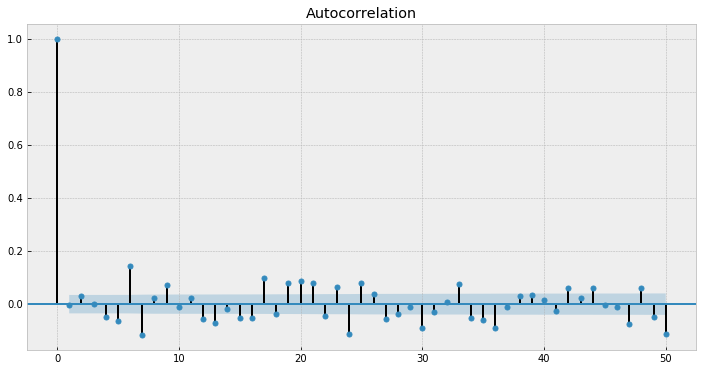

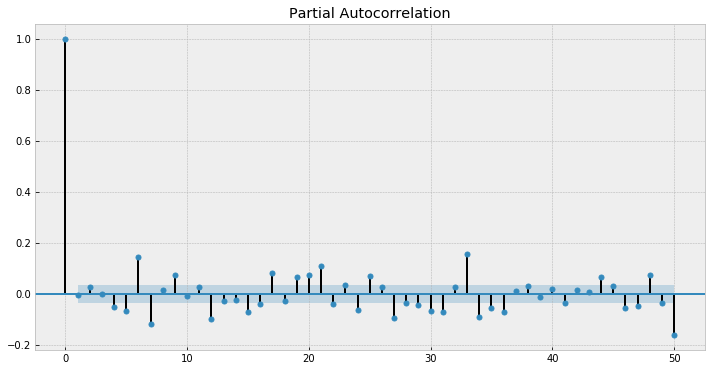

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
 
acf = plot_acf(y.diff(1).dropna(), lags=50)
pacf = plot_pacf(y.diff(1).dropna(), lags=50)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.832e+04    124.492    307.806      0.000    3.81e+04    3.86e+04
42589.2612249849


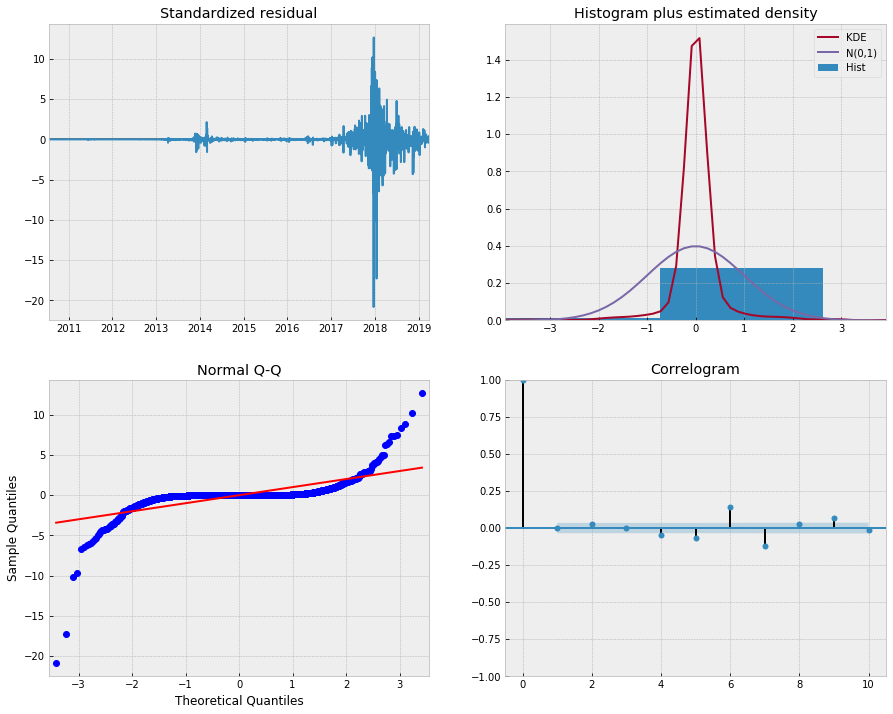

In [37]:
mod_baseline = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 0),
                                seasonal_order = (0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_baseline = mod_baseline.fit()

print(results_baseline.summary().tables[1])
print(results_baseline.aic)
b = results_baseline.plot_diagnostics(figsize=(15, 12))

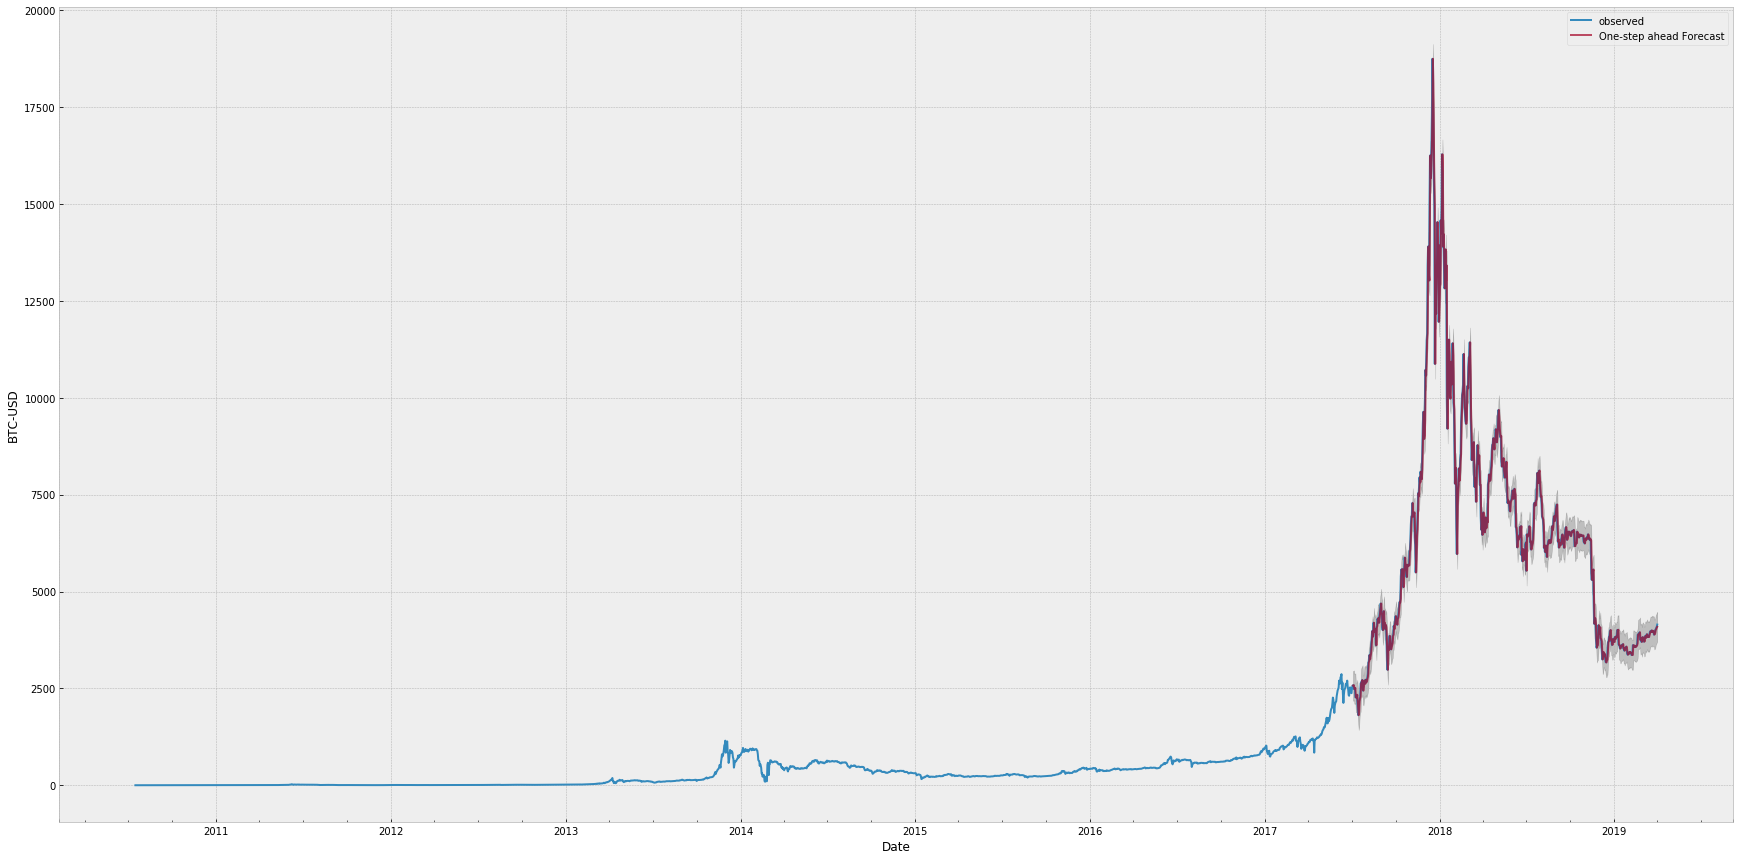

In [38]:
pred = results_baseline.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [39]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 187538.1976
The R2 of our model is 0.9788


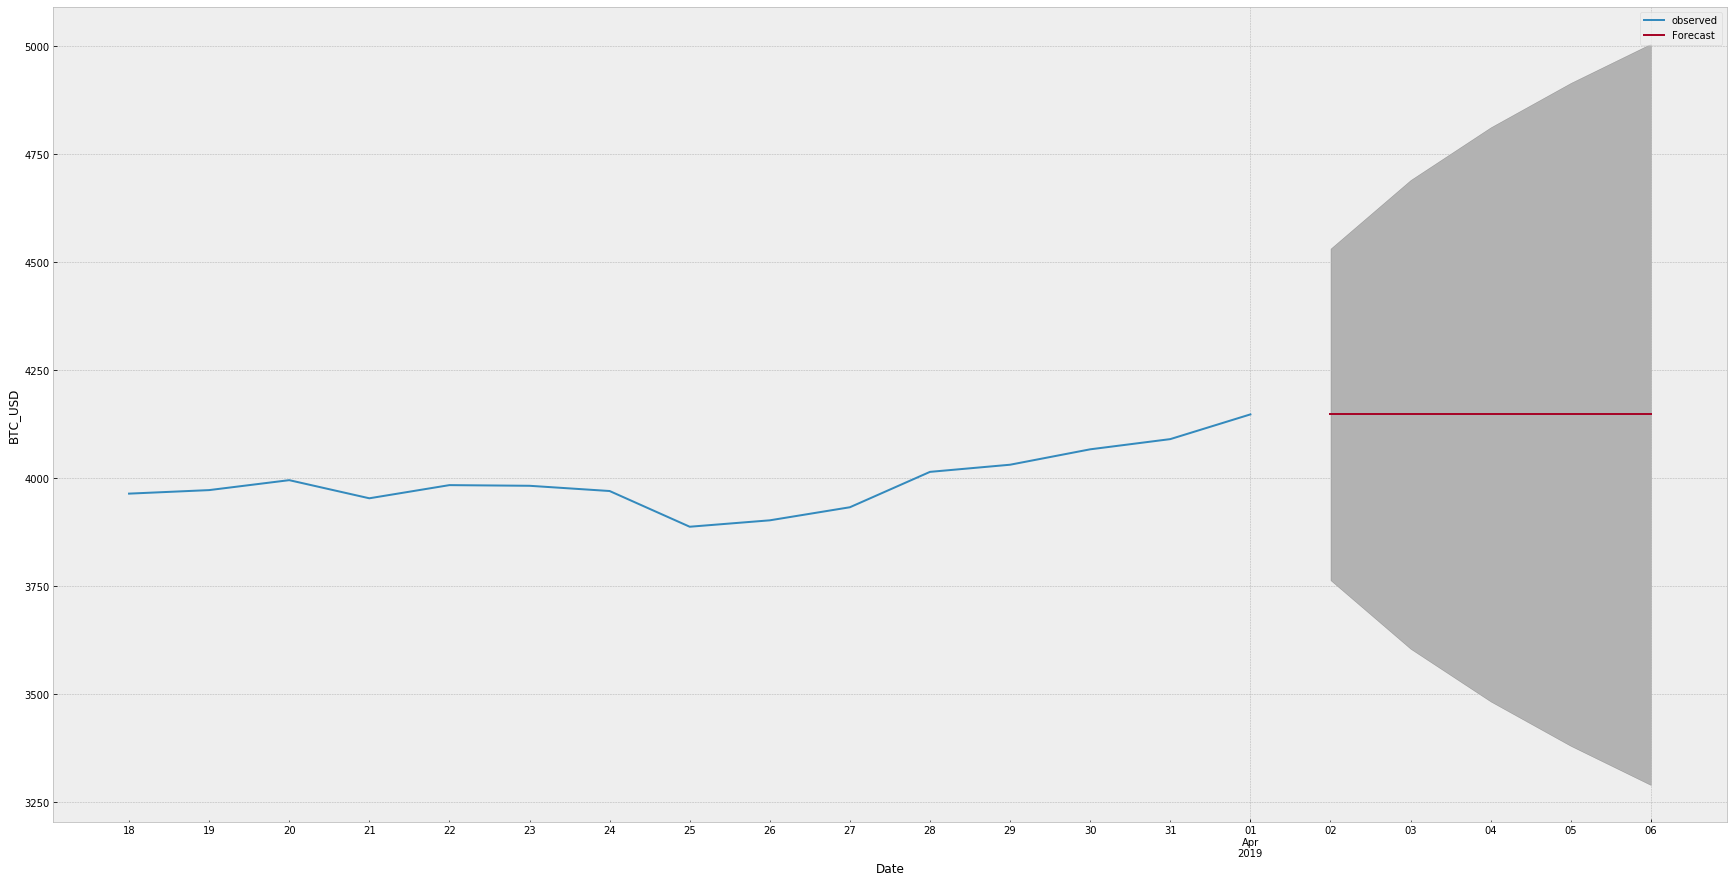

In [40]:
# Forcast the future
pred_uc = results_baseline.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

### Build an Advanced Model by Grid Search

In [41]:
d = [1]
p = q = range(21)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(0, 0, 0, 12)]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[-2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[-1], seasonal_pdq[0]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 0, 0, 12)
SARIMAX: (0, 1, 2) x (0, 0, 0, 12)
SARIMAX: (20, 1, 19) x (0, 0, 0, 12)
SARIMAX: (20, 1, 20) x (0, 0, 0, 12)


In [42]:
AIC_list = pd.DataFrame({}, columns=['param','param_seasonal','AIC'])

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                           order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            temp = pd.DataFrame([[ param ,  param_seasonal , results.aic ]], columns=['param','param_seasonal','AIC'])
            AIC_list = AIC_list.append( temp, ignore_index=True)

        except:
            continue

print('Finished...')

AIC_list = AIC_list.dropna()
m = np.amin(AIC_list['AIC'].values) # Find the minimum value in AIC
l = AIC_list['AIC'].tolist().index(m) # Find the index number of the lowest AIC
Min_AIC_list = AIC_list.iloc[l,:]

ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:42589.2612249849
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:42578.85697691815
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:42565.40506701802
ARIMA(0, 1, 3)x(0, 0, 0, 12)12 - AIC:42554.992534299905
ARIMA(0, 1, 4)x(0, 0, 0, 12)12 - AIC:42533.16783274835
ARIMA(0, 1, 5)x(0, 0, 0, 12)12 - AIC:42515.42683183176
ARIMA(0, 1, 6)x(0, 0, 0, 12)12 - AIC:42420.01810304486
ARIMA(0, 1, 7)x(0, 0, 0, 12)12 - AIC:42369.0002525443
ARIMA(0, 1, 8)x(0, 0, 0, 12)12 - AIC:42358.45706087189
ARIMA(0, 1, 9)x(0, 0, 0, 12)12 - AIC:42325.87345323652
ARIMA(0, 1, 10)x(0, 0, 0, 12)12 - AIC:42315.53134539418
ARIMA(0, 1, 11)x(0, 0, 0, 12)12 - AIC:42305.496192503175
ARIMA(0, 1, 12)x(0, 0, 0, 12)12 - AIC:42271.79149002061
ARIMA(0, 1, 13)x(0, 0, 0, 12)12 - AIC:42255.138441315044
ARIMA(0, 1, 14)x(0, 0, 0, 12)12 - AIC:42244.696567130886
ARIMA(0, 1, 15)x(0, 0, 0, 12)12 - AIC:42200.323304282094
ARIMA(0, 1, 16)x(0, 0, 0, 12)12 - AIC:42184.61765735735
ARIMA(0, 1, 17)x(0, 0, 0, 12)12 - AIC:42160.75328231418

ARIMA(7, 1, 1)x(0, 0, 0, 12)12 - AIC:42393.03273278011
ARIMA(7, 1, 2)x(0, 0, 0, 12)12 - AIC:42387.129709175184
ARIMA(7, 1, 3)x(0, 0, 0, 12)12 - AIC:42354.984247007786
ARIMA(7, 1, 4)x(0, 0, 0, 12)12 - AIC:42312.20154472008
ARIMA(7, 1, 5)x(0, 0, 0, 12)12 - AIC:42338.66523396735
ARIMA(7, 1, 6)x(0, 0, 0, 12)12 - AIC:42329.58308598783
ARIMA(7, 1, 7)x(0, 0, 0, 12)12 - AIC:42237.3457583433
ARIMA(7, 1, 8)x(0, 0, 0, 12)12 - AIC:42216.82936065107
ARIMA(7, 1, 9)x(0, 0, 0, 12)12 - AIC:42193.62791645308
ARIMA(7, 1, 10)x(0, 0, 0, 12)12 - AIC:42216.14040471931
ARIMA(7, 1, 11)x(0, 0, 0, 12)12 - AIC:42194.56271037439
ARIMA(7, 1, 12)x(0, 0, 0, 12)12 - AIC:42169.118229412416
ARIMA(7, 1, 13)x(0, 0, 0, 12)12 - AIC:42157.93014141307
ARIMA(7, 1, 14)x(0, 0, 0, 12)12 - AIC:42129.84360239105
ARIMA(7, 1, 15)x(0, 0, 0, 12)12 - AIC:42119.04574418838
ARIMA(7, 1, 16)x(0, 0, 0, 12)12 - AIC:42116.12985365589
ARIMA(7, 1, 17)x(0, 0, 0, 12)12 - AIC:42088.81787005527
ARIMA(7, 1, 18)x(0, 0, 0, 12)12 - AIC:42076.76703662731

ARIMA(14, 1, 0)x(0, 0, 0, 12)12 - AIC:42265.42811093283
ARIMA(14, 1, 1)x(0, 0, 0, 12)12 - AIC:42262.14843443551
ARIMA(14, 1, 2)x(0, 0, 0, 12)12 - AIC:42191.018415467086
ARIMA(14, 1, 3)x(0, 0, 0, 12)12 - AIC:42225.43536408524
ARIMA(14, 1, 4)x(0, 0, 0, 12)12 - AIC:42198.51836703645
ARIMA(14, 1, 5)x(0, 0, 0, 12)12 - AIC:42260.27469034844
ARIMA(14, 1, 6)x(0, 0, 0, 12)12 - AIC:42136.378285153696
ARIMA(14, 1, 7)x(0, 0, 0, 12)12 - AIC:66458.48181830099
ARIMA(14, 1, 8)x(0, 0, 0, 12)12 - AIC:42196.577939173316
ARIMA(14, 1, 9)x(0, 0, 0, 12)12 - AIC:42143.55083245436
ARIMA(14, 1, 10)x(0, 0, 0, 12)12 - AIC:42199.55952669195
ARIMA(14, 1, 11)x(0, 0, 0, 12)12 - AIC:42153.73843255467
ARIMA(14, 1, 12)x(0, 0, 0, 12)12 - AIC:42155.63352438898
ARIMA(14, 1, 13)x(0, 0, 0, 12)12 - AIC:42120.30940994079
ARIMA(14, 1, 14)x(0, 0, 0, 12)12 - AIC:42073.50445462508
ARIMA(14, 1, 15)x(0, 0, 0, 12)12 - AIC:42094.32873685275
ARIMA(14, 1, 16)x(0, 0, 0, 12)12 - AIC:42081.09766112284
ARIMA(14, 1, 17)x(0, 0, 0, 12)12 - AIC

ARIMA(20, 1, 19)x(0, 0, 0, 12)12 - AIC:41890.1906065452
ARIMA(20, 1, 20)x(0, 0, 0, 12)12 - AIC:41884.14013026783
Finished...


### Min_AIC_list ### 
param               (18, 1, 20)
param_seasonal    (0, 0, 0, 12)
AIC                     41846.3
Name: 398, dtype: object
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0307      0.027      1.120      0.263      -0.023       0.084
ar.L2         -0.0437      0.022     -1.946      0.052      -0.088       0.000
ar.L3         -0.5090      0.020    -25.347      0.000      -0.548      -0.470
ar.L4         -0.0635      0.024     -2.617      0.009      -0.111      -0.016
ar.L5         -0.1395      0.022     -6.229      0.000      -0.183      -0.096
ar.L6          0.0903      0.019      4.864      0.000       0.054       0.127
ar.L7         -0.0610      0.016     -3.876      0.000      -0.092      -0.030
ar.L8         -0.3430      0.015    -23.072      0.000      -0.372      -0.314
ar.L9         -0.0130      0.015     -0.864      0.388      -0.043 

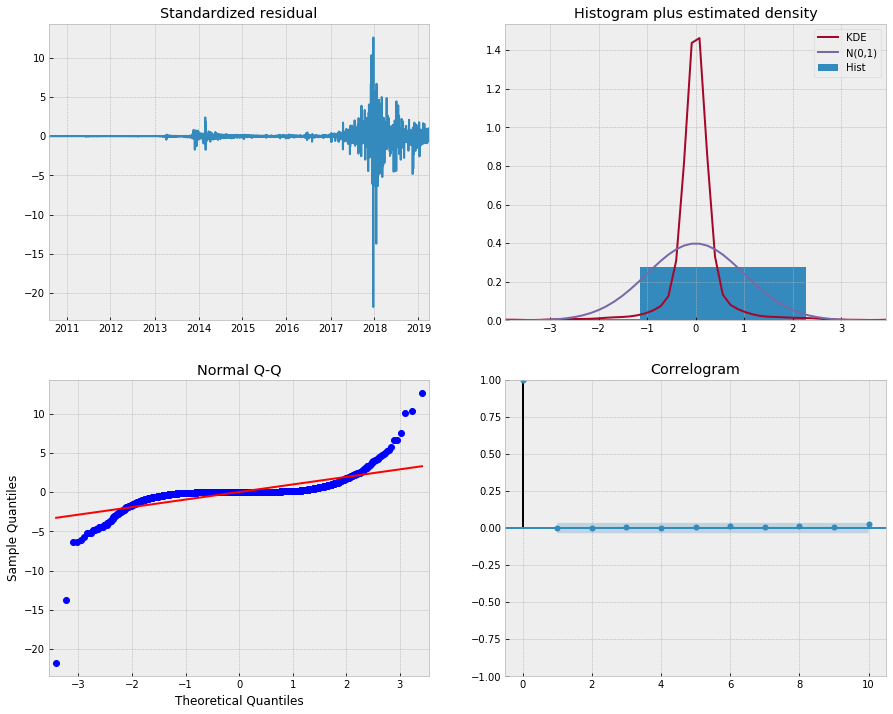

In [43]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=Min_AIC_list['param'],
                                seasonal_order=Min_AIC_list['param_seasonal'],
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print("### Min_AIC_list ### \n{}".format(Min_AIC_list))

print(results.summary().tables[1])
dia = results.plot_diagnostics(figsize=(15, 12))

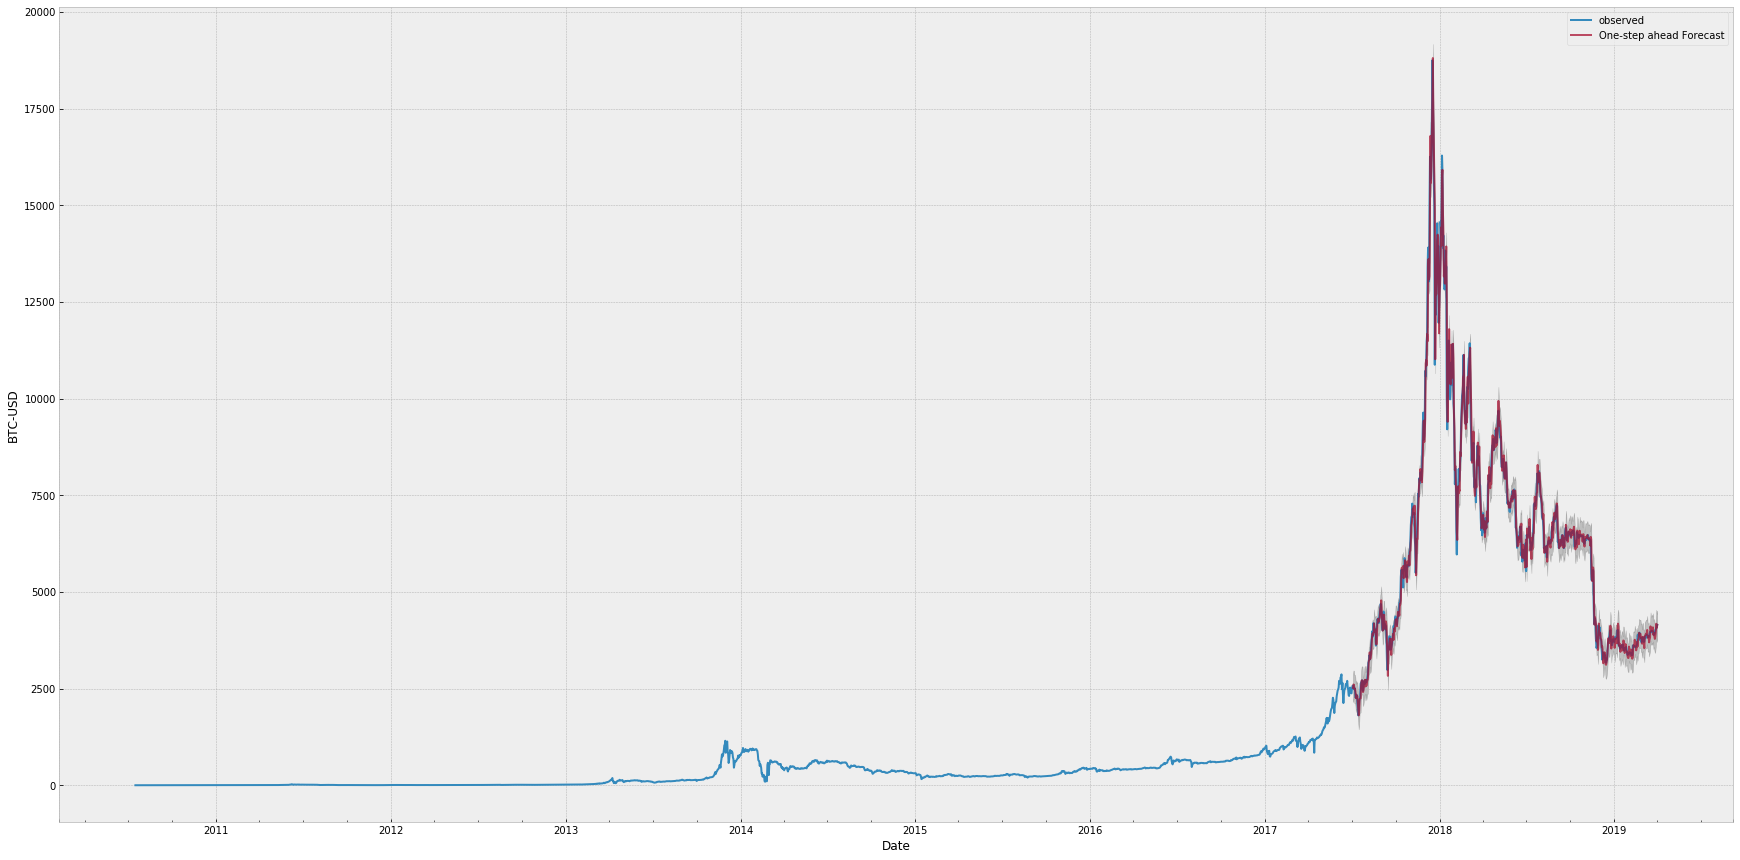

In [44]:
pred = results.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [45]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# R2
R2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_truth)) ** 2)
print('The R2 of our model is {}'.format(round(R2, 4)))

The Mean Squared Error of our forecasts is 153334.7817
The R2 of our model is 0.9827


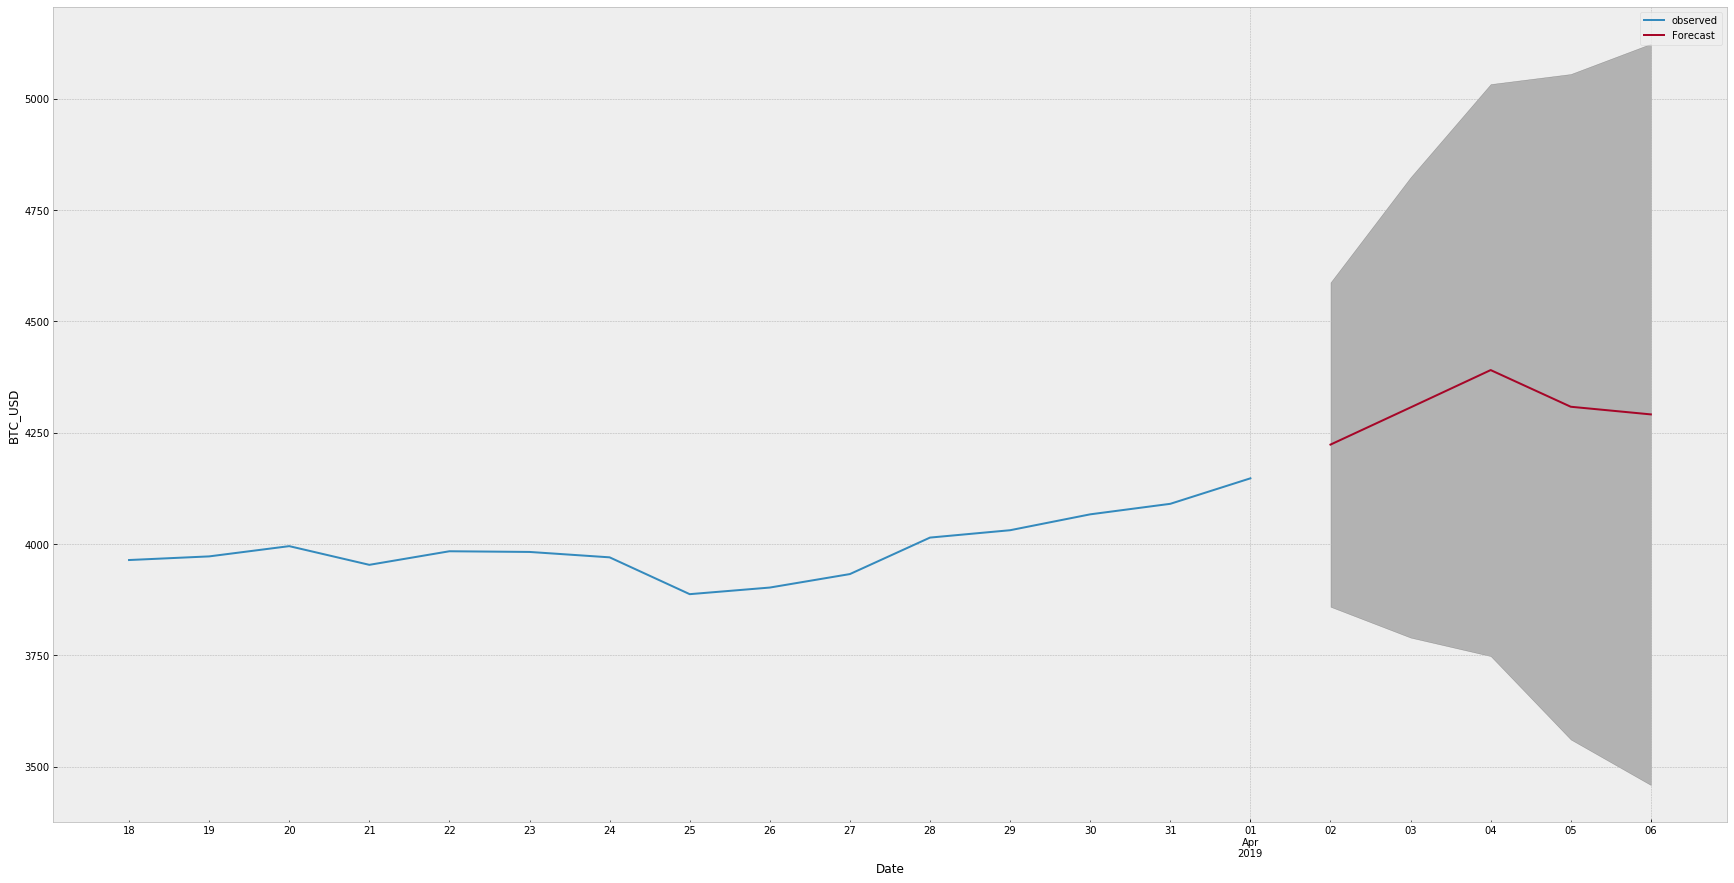

In [46]:
# Forcast the future
pred_uc = results.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

#### The advanced model slightly outperforms the baseline model.